# Function Generation for the Training of λ-Nets

## Specitication of Experiment Settings

In [1]:
#######################################################################################################################################
###################################################### CONFIG FILE ####################################################################
#######################################################################################################################################
sleep_time = 0 #minutes


config = {
    'function_family': {
        'maximum_depth': 5,
        'beta': 1,
        'decision_sparsity': 1,
        'fully_grown': True,
        'dt_type': 'vanilla', #'vanilla', 'SDT'
    },
    'data': {
        'number_of_variables': 21, 
        'num_classes': 2,
        'categorical_indices': [],
        
        'function_generation_type': 'make_classification_trained', # 'make_classification', 'make_classification_trained', 'random_decision_tree', 'random_decision_tree_trained'
        'objective': 'classification', # 'regression'
        
        'x_max': 1,
        'x_min': 0,
        'x_distrib': 'uniform', #'normal', 'uniform',       
                
        'lambda_dataset_size': 5000, #number of samples per function
        'number_of_generated_datasets': 10000,
    }, 
    'computation':{
        'n_jobs': 5,
        'use_gpu': False,
        'gpu_numbers': '0',
        'RANDOM_SEED': 42,   
    }
}


In [2]:
#######################################################################################################################################
########################################### IMPORT GLOBAL VARIABLES FROM CONFIG #######################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['computation'])

## Imports

In [3]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from itertools import product       # forms cartesian products
from more_itertools import random_product 
from tqdm import tqdm_notebook as tqdm
import pickle

import numpy as np

import pandas as pd
from joblib import Parallel, delayed

import random 
from random import sample 

import os
import sys

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

from sympy import Symbol, sympify

        
import seaborn as sns
        
import random 

import warnings

from time import perf_counter



from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utilities.DecisionTree_BASIC import SDT
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from IPython.display import Image

import numpy as np
import torch
np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

In [4]:
#######################################################################################################################################
###################################################### SET VARIABLES + DESIGN #########################################################
#######################################################################################################################################
os.environ['CUDA_VISIBLE_DEVICES'] = ''

sns.set_style("darkgrid")

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
    
    
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

In [5]:
from utilities.utility_functions import *
#######################################################################################################################################
####################################################### CONFIG ADJUSTMENTS ############################################################
#######################################################################################################################################

#######################################################################################################################################
################################################## UPDATE VARIABLES ###################################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['computation'])

#initialize_utility_functions_config_from_curent_notebook(config)

#######################################################################################################################################
###################################################### PATH + FOLDER CREATION #########################################################
#######################################################################################################################################
globals().update(generate_paths(config, path_type='data_creation'))
generate_directory_structure()

#######################################################################################################################################
############################################################ SLEEP TIMER ##############################################################
#######################################################################################################################################
sleep_minutes(sleep_time)

In [6]:
print(path_identifier_function_data)

lNetSize5000_numDatasets10000_var21_class2_make_classification_trained_xMax1_xMin0_xDistuniform_depth5_beta1_decisionSpars1_vanilla_fullyGrown


# Function Generation

In [7]:
if function_generation_type == 'random_decision_tree':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_random_decision_tree)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets))
elif function_generation_type == 'random_decision_tree_trained':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_random_decision_tree_trained)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets))  
elif function_generation_type == 'make_classification':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_make_classification)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets)) 
elif function_generation_type == 'make_classification_trained':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_make_classification_decision_tree_trained)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets))    

function_identifier_list = generate_decision_tree_identifier(config)  
identifier_series_list = [pd.Series(result[0],  index=function_identifier_list) for result in result_list]

function_df = pd.DataFrame(data=np.array([result[0] for result in result_list]), columns=function_identifier_list)

X_data_list = [[identifier_series, pd.DataFrame(result[1], columns=['x' + str(i) for i in range(number_of_variables)])] for identifier_series, result in zip(identifier_series_list, result_list)]
y_data_list = [[identifier_series, pd.DataFrame(result[2], columns=['result'])] for identifier_series, result in zip(identifier_series_list, result_list)]
y_data_raw_list = [[identifier_series, pd.DataFrame(result[3], columns=['result_raw'])] for identifier_series, result in zip(identifier_series_list, result_list)]


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   29.7s
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:   36.1s
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed:   48.0s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 1142 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 1558 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 2038 tasks      | elapsed:  2.9min
[Parallel(n_jobs=5)]: Done 2582 tasks      | elapsed:  3.5min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed:  4.2min
[Parallel(n_jobs=5)]: Done 3862 tasks      | elapsed:  4.9min
[Parallel(n_jobs=5)]: Done 4598 tasks      | elapsed:  5.8min
[Parallel(n_jobs=5)]: Done 5398 tasks      | elapsed:  6.7min
[Parallel(n_jobs=5)]: Done 6262 tasks      | elapsed:  7.7min
[Parallel(n_jobs=5)]: Done 7190 tasks      | elapsed:  8.8min


In [8]:
function_df.head()

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30,split0,split1,split2,split3,split4,split5,split6,split7,split8,split9,split10,split11,split12,split13,split14,split15,split16,split17,split18,split19,split20,split21,split22,split23,split24,split25,split26,split27,split28,split29,split30,lp0,lp1,lp2,lp3,lp4,lp5,lp6,lp7,lp8,lp9,lp10,lp11,lp12,lp13,lp14,lp15,lp16,lp17,lp18,lp19,lp20,lp21,lp22,lp23,lp24,lp25,lp26,lp27,lp28,lp29,lp30,lp31
0,0.646,0.373,0.647,0.546,0.565,0.222,0.459,0.529,0.281,0.527,0.518,0.535,0.467,0.300,0.598,0.485,0.342,-1.000,0.677,0.560,0.546,0.441,0.367,0.510,-1.000,0.398,0.675,0.408,0.716,0.469,-1.000,6.000,8.000,10.000,19.000,3.000,9.000,7.000,15.000,18.000,5.000,18.000,5.000,20.000,15.000,0.000,7.000,1.000,-1.000,17.000,19.000,17.000,15.000,0.000,13.000,-1.000,9.000,3.000,14.000,14.000,4.000,-1.000,0.535,0.224,0.083,0.778,1.000,1.000,0.133,0.632,0.576,0.279,0.510,0.680,0.590,0.825,0.045,0.578,0.000,0.833,1.000,1.000,0.580,0.299,0.151,0.643,0.000,1.000,0.000,0.333,0.062,0.385,1.000,1.000
1,0.538,0.451,0.364,0.409,0.547,0.577,0.663,0.571,0.405,0.418,0.621,0.330,0.533,0.546,0.417,0.659,0.704,0.615,0.322,0.407,0.450,0.485,0.653,0.708,0.566,0.605,0.621,0.350,0.540,0.655,0.790,14.000,19.000,18.000,9.000,16.000,1.000,6.000,7.000,16.000,6.000,1.000,0.000,7.000,19.000,5.000,20.000,3.000,1.000,17.000,9.000,5.000,6.000,11.000,19.000,8.000,11.000,10.000,0.000,8.000,7.000,7.000,0.673,0.136,0.926,0.000,0.770,0.330,0.614,0.345,0.783,0.333,0.354,0.103,0.727,0.276,0.830,0.323,1.000,0.000,0.355,0.857,1.000,0.000,0.086,0.750,0.897,0.712,0.322,0.767,0.909,0.467,0.996,0.000
2,0.515,0.451,0.603,0.515,0.437,0.322,0.474,0.616,0.532,0.416,0.286,0.602,0.599,0.527,0.511,0.284,0.610,0.345,0.638,0.719,0.591,0.674,0.431,0.721,0.488,0.372,0.473,0.537,0.487,0.680,0.754,2.000,6.000,18.000,12.000,19.000,18.000,13.000,10.000,10.000,4.000,17.000,4.000,2.000,7.000,14.000,7.000,20.000,6.000,3.000,6.000,6.000,5.000,7.000,3.000,8.000,15.000,6.000,20.000,9.000,0.000,18.000,0.458,0.862,0.217,0.911,0.967,0.362,0.068,0.469,0.841,0.000,0.513,0.168,0.829,0.000,0.135,0.317,0.800,0.111,0.159,1.000,0.392,0.680,0.690,0.902,0.088,0.514,0.133,0.809,0.339,0.742,0.828,0.321
3,0.538,0.426,0.438,0.444,0.599,0.471,0.338,0.414,0.351,0.536,0.393,0.471,0.264,0.580,0.655,0.418,0.505,0.499,0.520,0.399,0.597,0.477,0.323,0.637,0.304,-1.000,0.548,0.698,0.711,0.418,0.589,10.000,1.000,3.000,8.000,15.000,13.000,8.000,13.000,20.000,3.000,19.000,8.000,7.000,16.000,5.000,19.000,5.000,16.000,13.000,13.000,0.000,7.000,10.000,16.000,9.000,-1.000,15.000,9.000,20.000,8.000,8.000,0.395,0.981,0.453,0.052,0.050,1.000,0.950,0.699,0.336,0.046,0.422,0.089,0.500,0.074,0.652,0.933,0.278,0.769,0.000,0.841,1.000,1.000,0.086,0.545,0.055,0.857,0.824,0.125,0.801,0.952,0.289,0.913
4,0.489,0.625,0.519,0.586,0.528,0.372,0.466,0.385,0.517,0.608,0.345,0.579,0.586,0.432,0.432,0.510,0.822,0.319,0.470,0.669,0.760,0.503,-1.000,0.619,0.532,0.612,0.508,0.454,0.594,0.649,0.474,13.000,6.000,1.000,20.000,5.000,6.000,15.000,1.000,15.000,1.000,11.000,7.000,5.000,20.000,12.000,6.000,2.000,6.000,11.000,4.000,6.000,19.000,-1.000,20.000,13.000,3.000,12.000,18.000,5.000,6.000,0.000,0.063,0.847,0.012,1.000,0.000,1.000,1.000,0.000,0.966,0.000,0.000,0.714,0.000,1.000,0.000,0.000,0.116,0.909,0.286,0.961,0.893,0.545,0.072,0.784,0.808,0.138,0.956,0.000,0.050,0.324,0.333,0.898


In [9]:
X_data_list[0][0].head(10)

feat0   0.646
feat1   0.373
feat2   0.647
feat3   0.546
feat4   0.565
feat5   0.222
feat6   0.459
feat7   0.529
feat8   0.281
feat9   0.527
dtype: float64

In [10]:
X_data_list[0][1].head(10)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,0.477,0.528,0.409,0.470,0.603,0.456,0.349,0.531,0.519,0.541,0.723,0.504,0.356,0.406,0.346,0.632,0.805,0.578,0.559,0.494,0.540
1,0.748,0.442,0.723,0.508,0.474,0.495,0.712,0.251,0.542,0.332,0.330,0.751,0.777,0.543,0.307,0.504,0.319,0.570,0.486,0.419,0.378
2,0.581,0.391,0.624,0.680,0.431,0.586,0.511,0.651,0.547,0.223,0.391,0.718,0.627,0.546,0.412,0.619,0.518,0.414,0.455,0.408,0.388
3,0.769,0.335,0.534,0.702,0.542,0.500,0.499,0.504,0.585,0.457,0.543,0.333,0.512,0.437,0.255,0.764,0.913,0.628,0.505,0.486,0.355
4,0.619,0.353,0.479,0.608,0.438,0.485,0.425,0.509,0.624,0.470,0.247,0.500,0.368,0.349,0.478,0.521,0.601,0.555,0.625,0.506,0.376
5,0.433,0.714,0.544,0.541,0.319,0.549,0.373,0.609,0.290,0.683,0.523,0.591,0.269,0.258,0.226,0.586,0.395,0.516,0.324,0.374,0.526
6,0.549,0.610,0.549,0.615,0.192,0.521,0.513,0.649,0.285,0.514,0.420,0.473,0.464,0.274,0.321,0.620,0.559,0.327,0.477,0.406,0.451
7,0.575,0.476,0.385,0.332,0.532,0.607,0.722,0.367,0.646,0.429,0.518,0.469,0.239,0.479,0.569,0.665,0.381,0.544,0.492,0.549,0.457
8,0.382,0.533,0.288,0.542,0.527,0.674,0.736,0.495,0.414,0.337,0.945,0.570,0.574,0.549,0.558,0.482,0.325,0.472,0.481,0.519,0.556
9,0.565,0.322,0.817,0.773,0.388,0.507,0.572,0.725,0.361,0.372,0.514,0.552,0.569,0.507,0.574,0.634,0.402,0.454,0.467,0.491,0.452


In [11]:
y_data_list[0][0].head(10)

feat0   0.646
feat1   0.373
feat2   0.647
feat3   0.546
feat4   0.565
feat5   0.222
feat6   0.459
feat7   0.529
feat8   0.281
feat9   0.527
dtype: float64

In [12]:
y_data_list[1][1].head(10)

,result
0,1
1,1
2,0
3,1
4,1
5,0
6,0
7,1
8,0
9,1


In [13]:
y_data_list[2][1].head(10)

,result
0,0
1,1
2,1
3,1
4,0
5,1
6,1
7,0
8,0
9,1


In [14]:
y_data_raw_list[2][1].head(10)

,result_raw
0,0
1,1
2,1
3,1
4,0
5,1
6,1
7,0
8,0
9,1


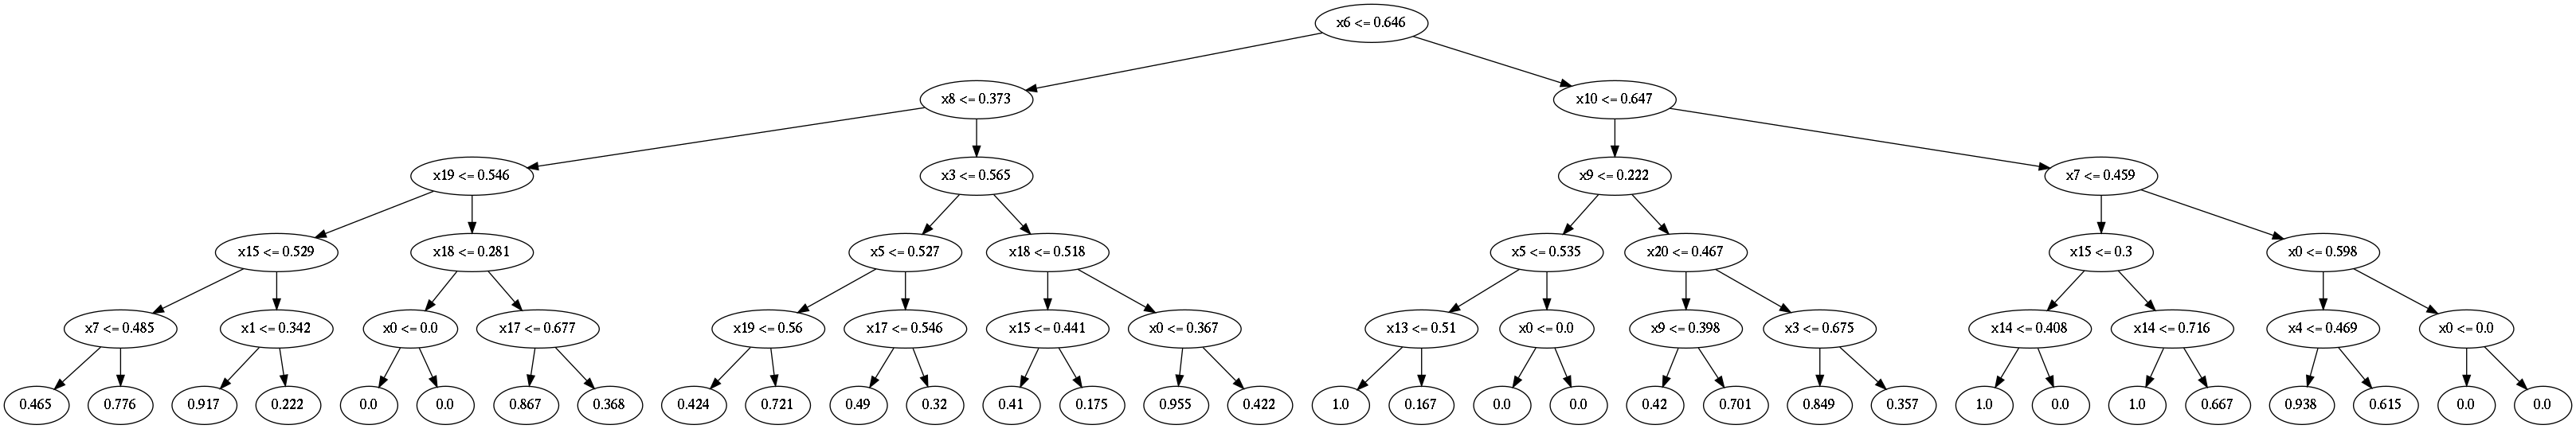

In [15]:
plot_tree_from_parameters(y_data_list[0][0].values, config)

In [16]:
path_functions = './data/saved_function_lists/functions_' + path_identifier_function_data + '.csv'
function_df.to_csv(path_functions, index=False)

path_X_data = './data/saved_function_lists/X_data_' + path_identifier_function_data + '.pkl'
with open(path_X_data, 'wb') as f:
    pickle.dump(X_data_list, f)
    
path_y_data = './data/saved_function_lists/y_data_' + path_identifier_function_data + '.pkl'
with open(path_y_data, 'wb') as f:
    pickle.dump(y_data_list, f)
